100%|██████████| 100/100 [00:01<00:00, 64.45it/s]


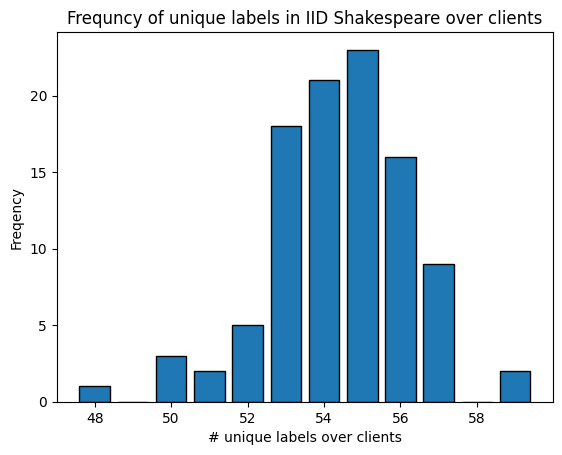

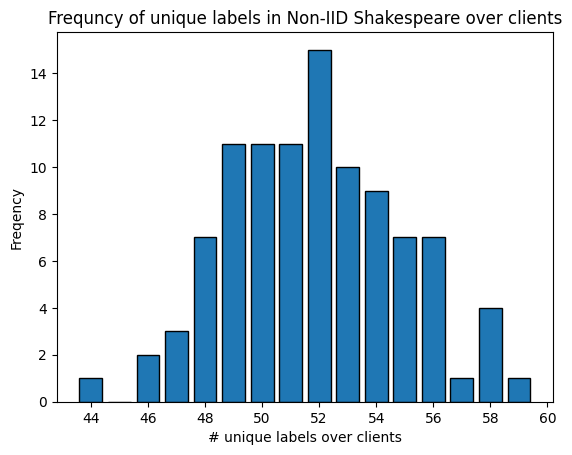

In [ ]:
# %%

from shakespeare_utils import shakespeare_data_pruning, tokenize_encode
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

def unique_client_labels(IID): 
    if IID:
        # iid
        json_train_path_iid = '../../datasets/shakespeare_iid/train/all_data_iid_0_0_keep_0_train_9.json'
        json_test_path_iid = '../../datasets/shakespeare_iid/test/all_data_iid_0_0_keep_0_test_9.json'
        # 2500 sentences per client retrieved, the last 500 will be our valuation set. 
        X_train_pruned, Y_train_pruned, X_test_pruned, Y_test_pruned = shakespeare_data_pruning(json_train_path_iid, json_test_path_iid, crop_amount=2000) 
    else:
        # non-IID
        json_train_path = '../../datasets/shakespeare/train/all_data_niid_0_keep_0_train_9.json'
        json_test_path = '../../datasets/shakespeare/test/all_data_niid_0_keep_0_test_9.json'
        # 2500 sentences per client retrieved, the last 500 will be our valuation set. 
        X_train_pruned, Y_train_pruned, X_test_pruned, Y_test_pruned = shakespeare_data_pruning(json_train_path, json_test_path, crop_amount=2000)

    train_sentence = ' '.join(' '.join(single_user_list) for single_user_list in X_train_pruned.values())
    vocab = sorted(set(train_sentence))
    vocab.append('<OOV>')

    char_to_idx = {char: idx for idx, char in enumerate(vocab)}

    X_train_list = [X_train_pruned[key] for key in sorted(X_train_pruned.keys())]
    Y_train_list = [Y_train_pruned[key] for key in sorted(Y_train_pruned.keys())]

    X_train_enc, Y_train_enc= [],[]
    for user in tqdm(range(len(X_train_list))):
        X_train_enc.append(tokenize_encode(X_train_list[user], vocab, char_to_idx))
        Y_train_enc.append(tokenize_encode(Y_train_list[user], vocab, char_to_idx))

    unique_clients_labels = []
    for c in range(len(Y_train_enc)):
        # for s in Y_train_enc[c]:
        #     print(s)
        # print(c)
        a = np.array(Y_train_enc[c]).squeeze()
        # print(a)
        unique_clients_labels.append(len(np.unique(a)))

    return unique_clients_labels


unique_clients_labels_IID = unique_client_labels(IID=1)
unique_clients_labels_NON_IID = unique_client_labels(IID=0)

plt.hist(unique_clients_labels_IID, bins=np.arange(np.min(unique_clients_labels_IID), np.max(unique_clients_labels_IID) + 2) - 0.5, edgecolor='black', rwidth=0.8)
plt.title("Frequncy of unique labels in IID Shakespeare over clients")
plt.xlabel("# unique labels over clients")
plt.ylabel("Freqency")
plt.show()


plt.hist(unique_clients_labels_NON_IID, bins=np.arange(np.min(unique_clients_labels_NON_IID), np.max(unique_clients_labels_NON_IID) + 2) - 0.5, edgecolor='black', rwidth=0.8)
plt.title("Frequncy of unique labels in Non-IID Shakespeare over clients")
plt.xlabel("# unique labels over clients")
plt.ylabel("Freqency")
plt.show()